## ⼆、基于统计学的⽅法

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

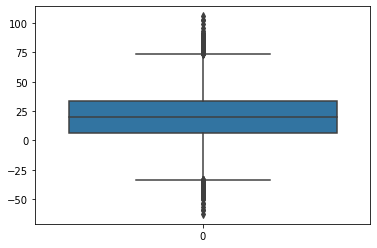

In [2]:
data = np.random.randn(50000) * 20 + 20
sns.boxplot(data=data)

看了赵越大佬的分享，对常见的异常检测方法有了一定的了解，看pdf的时候也相对顺利；下面准备效仿knn，用非参统计的方法跑一下。

In [16]:
from pyod.utils.data import generate_data
from pyod.models.hbos import HBOS
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [9]:
# 训练一个kNN检测器
clf_name = 'HBOS'
clf = HBOS() # 初始化检测器clf

In [17]:
contamination = 0.1  # 异常样本在所有样本(训练集样本加测试集样本)中的比例
n_train = 200
n_test = 100

In [18]:
X_train, y_train, X_test, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=2,
                      contamination=contamination, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

C:\Users\shepherd\anaconda3\lib\site-packages\pyod\utils\data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


((200, 2), (200,), (100, 2), (100,))

In [23]:
X_train

array([[ 6.43365854,  5.5091683 ],
       [ 5.04469788,  7.70806466],
       [ 5.92453568,  5.25921966],
       [ 5.29399075,  5.67126197],
       [ 5.61509076,  6.1309285 ],
       [ 6.18590347,  6.09410578],
       [ 7.16630941,  7.22719133],
       [ 4.05470826,  6.48127032],
       [ 5.79978164,  5.86930893],
       [ 4.82256361,  7.18593123],
       [ 5.98049594,  6.28356746],
       [ 6.33258429,  6.66392412],
       [ 5.76600157,  5.97620246],
       [ 6.0758669 ,  6.53009041],
       [ 5.88816972,  5.97352684],
       [ 5.40257927,  5.37920689],
       [ 6.75674297,  7.2607963 ],
       [ 5.70636785,  6.29952894],
       [ 5.04840502,  5.67376352],
       [ 5.64370447,  7.21564822],
       [ 6.25760622,  4.88869009],
       [ 4.2626848 ,  5.16744774],
       [ 6.13773065,  6.25856245],
       [ 6.59485505,  4.53524592],
       [ 6.45018449,  6.02033788],
       [ 6.37739196,  6.52573284],
       [ 7.86684582,  6.85415672],
       [ 6.07689629,  6.33425195],
       [ 5.23991937,

In [24]:
 clf.fit(X_train)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [26]:
# 训练集
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_
y_train_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0])

In [29]:
# 测试集
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)
y_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
y_test_scores

array([3.33017782, 3.33017782, 4.54688159, 3.33017782, 3.33017782,
       2.23013136, 2.47701056, 3.08329861, 2.23013136, 2.23013136,
       3.08329861, 3.78188091, 2.23013136, 3.78188091, 3.78188091,
       3.08329861, 3.69371434, 2.23013136, 3.5350017 , 2.23013136,
       3.33017782, 3.33017782, 2.47701056, 4.52951172, 2.23013136,
       3.69371434, 3.78188091, 3.5350017 , 2.23013136, 2.23013136,
       3.69371434, 2.47701056, 4.54688159, 2.23013136, 3.5350017 ,
       2.23013136, 2.23013136, 3.08329861, 2.47701056, 4.24930731,
       3.78188091, 3.78188091, 2.47701056, 2.47701056, 2.23013136,
       3.08329861, 2.23013136, 2.23013136, 4.99858468, 2.47701056,
       2.47701056, 2.47701056, 3.5350017 , 3.08329861, 2.23013136,
       2.23013136, 2.47701056, 3.5350017 , 2.47701056, 2.23013136,
       3.33017782, 2.47701056, 2.47701056, 3.08329861, 4.24930731,
       3.78188091, 3.78188091, 3.69371434, 4.99858468, 3.33017782,
       2.23013136, 2.47701056, 2.23013136, 4.24930731, 2.23013

In [31]:
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)    


On Training Data:
HBOS ROC:0.9947, precision @ rank n:0.8


In [32]:
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Test Data:
HBOS ROC:0.9744, precision @ rank n:0.6


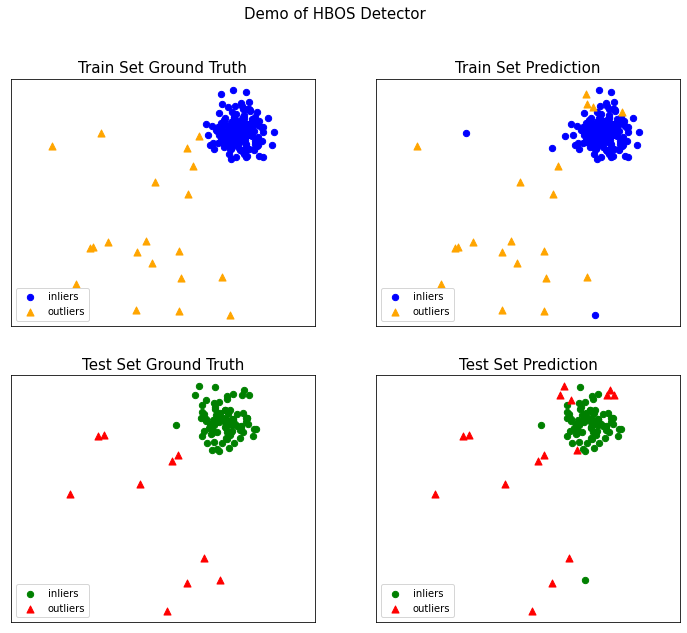

In [33]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,y_test_pred, show_figure=True, save_figure=False)

In [ ]:
# 从结果来看，再该数据集上，HBOS的准确度略低于kNN